<a href="https://colab.research.google.com/github/shyamjith94/PyTorch/blob/main/MNISTHandWrittenDigit_DataClaasification_ANNnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [346]:
%%capture
!pip install torch torchvision

**Using Artificial neural network**

In [347]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch, torchvision
import torch.nn as NN
import torch.nn.functional as F

from sklearn.metrics import confusion_matrix

In [348]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [349]:
# load in mnist data
transform = transforms.ToTensor()

In [350]:
train_data = datasets.MNIST(root='/content/drive/MyDrive/PyTorch/Data/MNISTDownloadMe', train=True, download=True, transform=transform)

In [351]:
test_data = datasets.MNIST(root='/content/drive/MyDrive/PyTorch/Data/MNISTDownloadMe', train=False, download=True, transform=transform)

In [352]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/PyTorch/Data/MNISTDownloadMe
    Split: Train
    StandardTransform
Transform: ToTensor()

In [353]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/PyTorch/Data/MNISTDownloadMe
    Split: Test
    StandardTransform
Transform: ToTensor()

In [354]:
print(type(train_data))
print(type(test_data))

torchvision.datasets.mnist.MNIST
torchvision.datasets.mnist.MNIST


In [355]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [356]:
image, label = train_data[0]

In [357]:
image.shape
# 1 is for color grayscale or black and white

torch.Size([1, 28, 28])

In [358]:
label

5

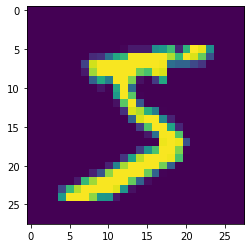

In [359]:
# need to reshape image 28/28
plt.imshow(image.reshape((28,28)))

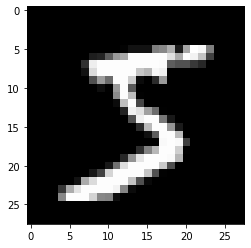

In [360]:
plt.imshow(image.reshape((28,28)), cmap='gray')

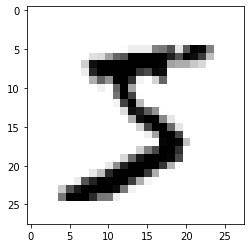

In [361]:
plt.imshow(image.reshape((28,28)), cmap='gist_yarg')

In [362]:
torch.manual_seed(101)
# Each time trin 100 image at one batch
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [363]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

In [364]:
#  selecting first batch 
for image, label in train_loader:
    break # we get first 100 mage break the loop


In [365]:
image.shape
# 100 images 1 color chanel shape 28/28

torch.Size([100, 1, 28, 28])

In [366]:
label.shape

torch.Size([100])

Labels:  [   4    6    2    3    4    0    9    5    0    1    6    9]


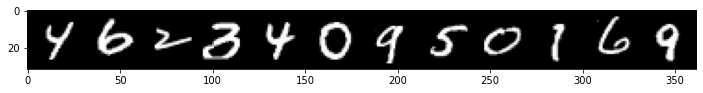

In [367]:
#  print first 12 labels
print('Labels: ', label[:12].numpy())
# print first 12 images
im = make_grid(image[:12], nrow=12)
plt.figure(figsize=(12, 10))
# we need to trnpose the image from CWH(color, width, height) to WHC(width height color)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

**CreatingModel**

In [368]:
class multilayerPercepton(NN.Module):
    """
    multi layer clssification problem
    """
    def __init__(self, in_sz=784, out_sz=10, layers=[120, 84]):
        # in_sz  -  784 (28*28)
        # out_zs - 10 (0 to 10)
        super().__init__()

        self.fully_con_one = NN.Linear(in_sz, layers[0])
        self.fully_con_two = NN.Linear(layers[0], layers[1])
        self.fully_con_thr = NN.Linear(layers[1], out_sz)
    
    def forward(self, x):
        x = F.relu(self.fully_con_one(x))
        x = F.relu(self.fully_con_two(x))
        x = self.fully_con_thr(x)
        return F.log_softmax(x, dim=1) # multi class classification



In [369]:
torch.manual_seed(101)
model = multilayerPercepton()
model

multilayerPercepton(
  (fully_con_one): Linear(in_features=784, out_features=120, bias=True)
  (fully_con_two): Linear(in_features=120, out_features=84, bias=True)
  (fully_con_thr): Linear(in_features=84, out_features=10, bias=True)
)

In [370]:
# training connection to net summary
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [371]:
criterion = NN.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [372]:
image.shape

torch.Size([100, 1, 28, 28])

In [373]:
# change shape to [100, 784]
image.view(100, -1).shape # -1 means grab ( 1, 28, 28) together

torch.Size([100, 784])

**Train Model**

In [374]:
import time

start_time = time.time()

# Training
epochs = 10
train_loss = []
test_loss = []

train_correct = []
test_correct = []

for i in range(epochs):
    trn_crr = 0
    tst_crr = 0

    for batch, (x_train, y_train) in enumerate(train_loader):
        batch+=1
        
        y_pred = model(x_train.view(100, -1))
        loss = criterion(y_pred, y_train)
        
        # last layer have 10 neuron like [0.1, 0.0...., 0.8]
        # selecting max in that
        predicted = torch.max(y_pred.data, 1)[1]
        batch_crr = (predicted == y_train).sum()
        trn_crr +=batch_crr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch%200 == 0:
            acuuracy = trn_crr.item()*100/(100*batch)
            print(f'Epochs {i}, batch {batch} loss:\t{loss.item()}\t accuracy:\t{acuuracy}')
    
    train_loss.append(loss)
    train_correct.append(trn_crr)

    # test validation
    with torch.no_grad():
        for batch, (x_test, y_test) in enumerate(test_loader):
            
            # given test loader batch size 500
            y_val = model(x_test.view(500, -1))
            pred = torch.max(y_val.data, 1)[1]
            tst_crr += (pred == y_test).sum()

    loss = criterion(y_val, y_test)
    test_loss.append(loss)
    test_correct.append(tst_crr)

total_time = start_time - time.time()
print(f'duration {total_time/60}')

Epochs 0, batch 200 loss:	0.3094659149646759	 accuracy:	83.585
Epochs 0, batch 400 loss:	0.16791896522045135	 accuracy:	87.945
Epochs 0, batch 600 loss:	0.14138494431972504	 accuracy:	89.78833333333333
Epochs 1, batch 200 loss:	0.22795958817005157	 accuracy:	94.96
Epochs 1, batch 400 loss:	0.251648873090744	 accuracy:	95.1825
Epochs 1, batch 600 loss:	0.13384343683719635	 accuracy:	95.41833333333334
Epochs 2, batch 200 loss:	0.15869437158107758	 accuracy:	96.6
Epochs 2, batch 400 loss:	0.07899345457553864	 accuracy:	96.665
Epochs 2, batch 600 loss:	0.07815248519182205	 accuracy:	96.73833333333333
Epochs 3, batch 200 loss:	0.15073566138744354	 accuracy:	97.385
Epochs 3, batch 400 loss:	0.1978723406791687	 accuracy:	97.3875
Epochs 3, batch 600 loss:	0.02058776468038559	 accuracy:	97.44166666666666
Epochs 4, batch 200 loss:	0.0752447322010994	 accuracy:	98.17
Epochs 4, batch 400 loss:	0.04172087088227272	 accuracy:	98.0675
Epochs 4, batch 600 loss:	0.057196617126464844	 accuracy:	97.99333

**Evaluation**

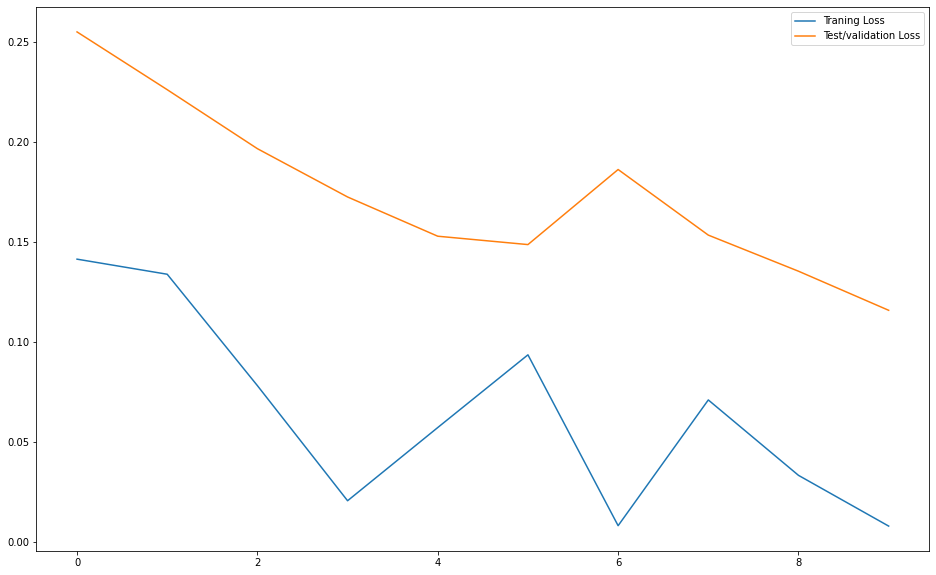

In [375]:
plt.figure(figsize=(16,10))
plt.plot(train_loss, label="Traning Loss")
plt.plot(test_loss, label="Test/validation Loss")
plt.legend()

In [376]:
train_correct

[tensor(53873),
 tensor(57251),
 tensor(58043),
 tensor(58465),
 tensor(58796),
 tensor(59041),
 tensor(59237),
 tensor(59344),
 tensor(59443),
 tensor(59545)]

In [377]:
trn_acr = [t/600 for t in train_correct]

In [378]:
trn_acr

[tensor(89.7883),
 tensor(95.4183),
 tensor(96.7383),
 tensor(97.4417),
 tensor(97.9933),
 tensor(98.4017),
 tensor(98.7283),
 tensor(98.9067),
 tensor(99.0717),
 tensor(99.2417)]

In [379]:
tsr_acr = [t/100 for t in test_correct]

In [380]:
tsr_acr

[tensor(94.8200),
 tensor(96.0400),
 tensor(96.5000),
 tensor(96.9000),
 tensor(97.2400),
 tensor(97.5500),
 tensor(97.1500),
 tensor(97.7700),
 tensor(97.6300),
 tensor(97.4900)]

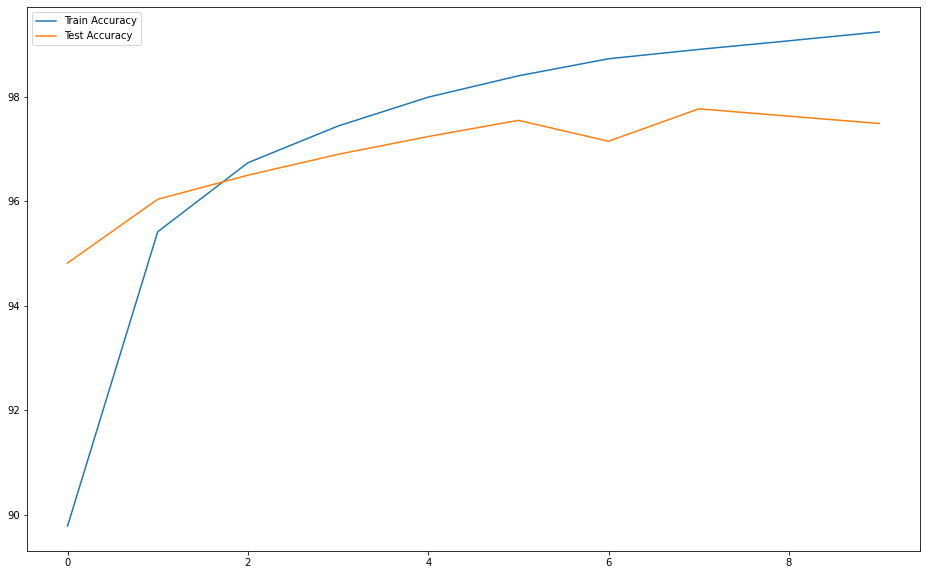

In [381]:
plt.figure(figsize=(16,10))
plt.plot(trn_acr, label="Train Accuracy")
plt.plot(tsr_acr, label="Test Accuracy")
plt.legend()

**New unseen Data**

In [383]:
test_load_all = DataLoader(test_data,batch_size=10000, shuffle=False)

In [385]:
with torch.no_grad():
    correct = 0

    for x_test, y_test in test_load_all:
        y_val = model(x_test.view(len(x_test), -1))
        pred = torch.max(y_val, 1)[1]
        correct += (pred == y_test).sum()
print(f'Accuracy \t:{100*correct.item()/len(test_data)}')

Accuracy 	:97.49


**Confuesion Metrics**

In [387]:
confusion_matrix(pred.view(-1), y_test.view(-1))

array([[ 971,    0,    6,    0,    1,    3,    7,    0,   11,    1],
       [   0, 1127,    0,    0,    0,    0,    3,    8,    0,    2],
       [   0,    3, 1019,   11,    2,    0,    2,   17,   12,    0],
       [   2,    1,    2,  979,    0,   16,    1,    0,    6,    1],
       [   2,    0,    2,    0,  962,    3,    6,    3,    5,   10],
       [   0,    1,    0,    4,    0,  860,    5,    0,    5,    1],
       [   1,    2,    0,    0,    5,    2,  930,    0,    1,    0],
       [   0,    0,    1,    4,    1,    1,    0,  987,    4,    1],
       [   2,    1,    1,    1,    0,    1,    3,    2,  922,    1],
       [   2,    0,    1,   11,   11,    6,    1,   11,    8,  992]])

**Examine The Misses**

In [391]:
misses = np.array([])
for i in range(len(pred.view(-1))):
    if pred[i] != y_test[i]:
        misses = np.append(misses, i).astype(int)
print('misses\n', misses)

misses
 [  61  115  149  247  259  290  321  340  381  391  445  495  578  582
  691  844  846  900  938  947  951  965 1014 1039 1112 1128 1156 1181
 1182 1226 1232 1242 1247 1260 1272 1299 1319 1328 1393 1444 1466 1496
 1500 1522 1530 1531 1549 1587 1626 1670 1681 1717 1754 1782 1800 1813
 1850 1878 1901 1903 1941 1981 1984 2004 2016 2024 2040 2053 2063 2070
 2098 2105 2109 2118 2130 2135 2182 2195 2224 2272 2293 2298 2387 2408
 2422 2462 2488 2526 2597 2607 2618 2654 2720 2730 2758 2810 2877 2896
 2921 2927 2930 2939 2953 2970 2995 3073 3115 3117 3130 3173 3251 3289
 3364 3405 3422 3451 3503 3520 3549 3558 3559 3567 3662 3702 3727 3751
 3780 3808 3811 3818 3838 3853 3871 3902 3906 3941 3951 3954 3968 3976
 3985 4027 4065 4075 4078 4093 4117 4154 4199 4306 4355 4359 4382 4425
 4433 4437 4497 4536 4551 4571 4578 4601 4639 4671 4724 4731 4751 4761
 4807 4814 4823 4860 4880 4890 4956 4966 4990 5138 5331 5457 5586 5600
 5620 5634 5642 5654 5676 5734 5749 5936 5937 5955 5972 5973 5981 598

In [393]:
# set up an iterator to feed bached rows
r = 12
row = iter(np.array_split(misses, len(misses)//r+1))
row

index: [1941 1981 1984 2004 2016 2024 2040 2053 2063 2070 2098 2105]
label: [   7    6    2    8    7    7    5    4    7    7    2    3]
guess: [   2    9    0    9    2    9    4    9    2    9    0    9]


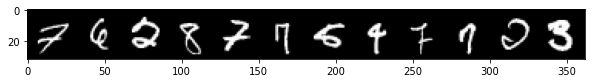

In [400]:
next_row = next(row)
print('index:', next_row)
print('label:', y_test.index_select(0, torch.tensor(next_row)).numpy())
print('guess:', pred.index_select(0, torch.tensor(next_row)).numpy())


images = x_test.index_select(0, torch.tensor(next_row))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1,2,0)))